In [1]:
# # Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from subprocess import check_output
#print (check_output(["ls","../input"]).decode("utf8"))


In [2]:
## Loading files using pandas
matches=pd.read_csv('D:/Data Analysis with Python/IPL Data Set/matches.csv')
deliveries=pd.read_csv('D:/Data Analysis with Python/IPL Data Set/deliveries.csv')

In [3]:
matches.head(8)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN


In [4]:
deliveries.head(8)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
5,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,6,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,7,BB McCullum,SC Ganguly,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,2,1,BB McCullum,SC Ganguly,Z Khan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Cleaning & Transformation of Data

In [5]:
matches.drop(['umpire3'],axis=1,inplace=True) #as the values are Nan so droping umpire3 field
deliveries.fillna(0,inplace=True) #filling 0 for Nan values

In [6]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

In [7]:
print("Total mayches played:",matches.shape[0])

Total mayches played: 577


In [8]:
print('Venues played at:',matches['city'].unique())

Venues played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']


In [9]:
print('Teams:',matches['team1'].unique())

Teams: ['KKR' 'CSK' 'RR' 'MI' 'DC' 'KXIP' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']


In [10]:
print('Total venues played at:',matches['city'].nunique())

Total venues played at: 30


In [11]:
print('\n Total umpires', matches['umpire1'].nunique())


 Total umpires 43


In [12]:
print((matches['player_of_match'].value_counts()).idxmax(),': has most of the man of the matches awards')

CH Gayle : has most of the man of the matches awards


In [13]:
print((matches['winner'].value_counts().idxmax(),': has the highest number of victories'))

('MI', ': has the highest number of victories')


In [14]:
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1','team2','winner','win_by_runs']]

,season,team1,team2,winner,win_by_runs
560,2016,RCB,GL,RCB,144


RCB won against GL with highest run margin in year 2016

In [15]:
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1','team2','winner','win_by_wickets','city']]

,season,team1,team2,winner,win_by_wickets,city
12,2008,MI,DC,DC,10,Mumbai


    DC won with highest wicktes against MI in year 2008 being a visitor

Toss Decisions

In [16]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    54.592721
bat      45.407279
Name: toss_decision, dtype: float64


## Toss Decision Across Seasons

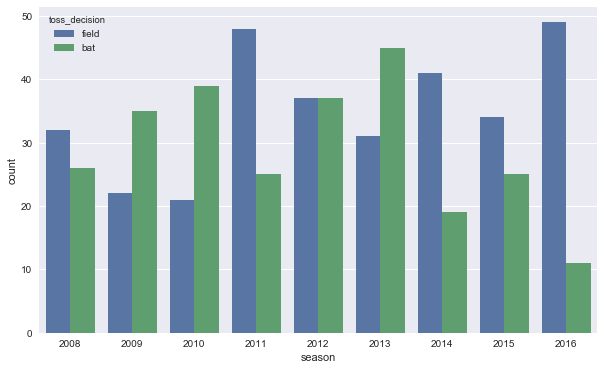

In [17]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
mlt.show()

Toss Decision has been varied from season to season as some season has more probability to elect fielding then batting and vice versa in different seasons. 

## Maximum Toss Winners

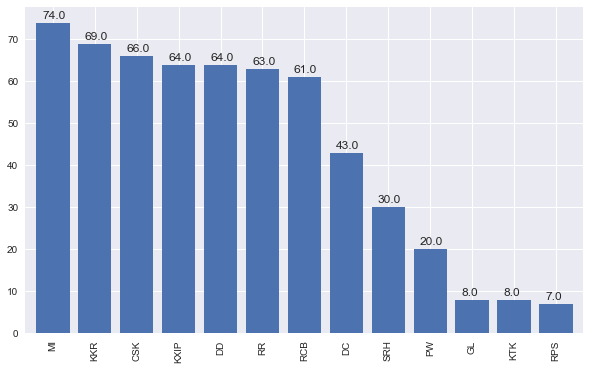

In [18]:
mlt.subplots(figsize=(10,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+1))
mlt.show()

The above graph indicates thats MI has more toss winners followed by KKR and CSK. The unluckiest one in this chart has been RPS leading by KKR.

## Total Matches V/s Wins for Teams

In [19]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 =go.Bar(x=matches_played_byteams.index,y=matches_played_byteams['Total Matches'],name= 'Total Matches')
trace2=go.Bar(x=matches_played_byteams.index,y=matches_played_byteams['wins'],name= 'Matches Won')

data=[trace1,trace2]
layout= go.Layout(barmode='stack')

fig=go.Figure(data=data,layout=layout)
py.iplot(fig,filename='stacked-bar')

## Is the Toss Winner the Match Winner

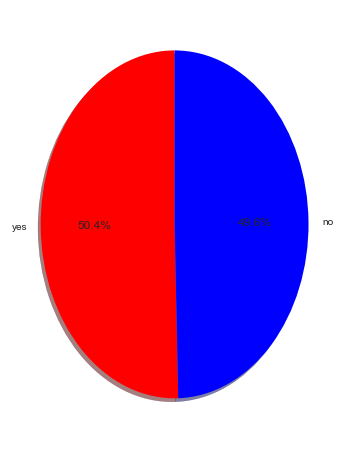

In [20]:
df=matches[matches['toss_winner']==matches['winner']]
slices=[len(df),(577-len(df))]
labels=['yes','no']
mlt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','b'])
fig=mlt.gcf()
fig.set_size_inches(6,8)
mlt.show()

Its not necessary that the toss winner will be the match winner because the chart shows that its 50-50 probability of winning the game.

## Matches Palyed Across Each Season

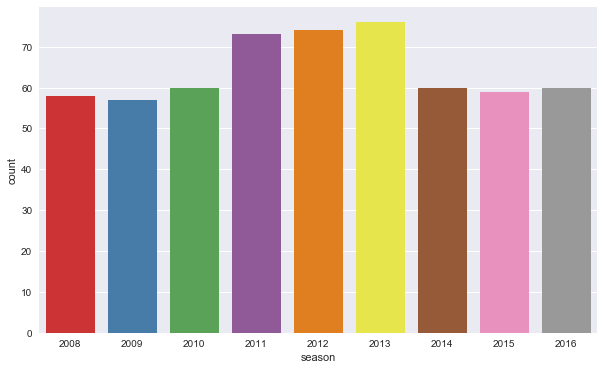

In [21]:
mlt.subplots(figsize=(10,6))
sns.countplot(x='season', data=matches,palette="Set1")
sns.plt.show()

## Run Across the Season

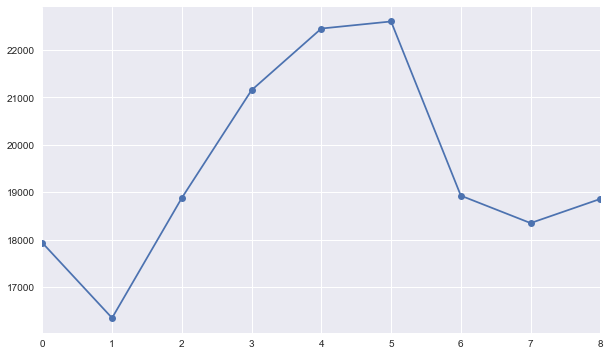

In [22]:
mlt.subplots(figsize=(10,6))
batsmen=matches[['id','season']].merge(deliveries, left_on='id',right_on='match_id', how='left').drop('id',axis=1)
#merging matche and deliveries data frame by id and match id
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season['total_runs'].plot(marker='o')
mlt.show()

## Average runs per matchin each season

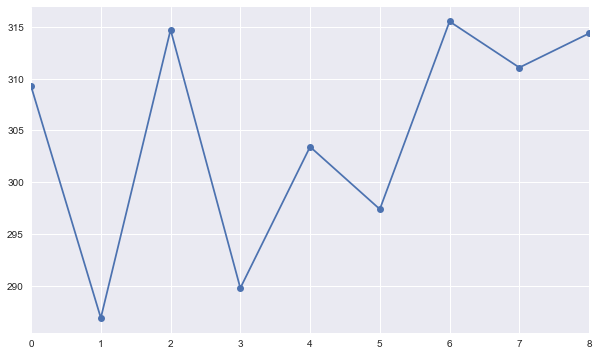

In [23]:
mlt.subplots(figsize=(10,6))
avgruns_per_season=matches.groupby(['season']).count().id.reset_index()
avgruns_per_season.rename(columns={'id':'matches'},inplace=True)
avgruns_per_season['total_runs']=season['total_runs']
avgruns_per_season['average_runs_per_match']=avgruns_per_season['total_runs']/avgruns_per_season['matches']
avgruns_per_season['average_runs_per_match'].plot(marker='o')
mlt.show()

## Sixes and Fours per Season

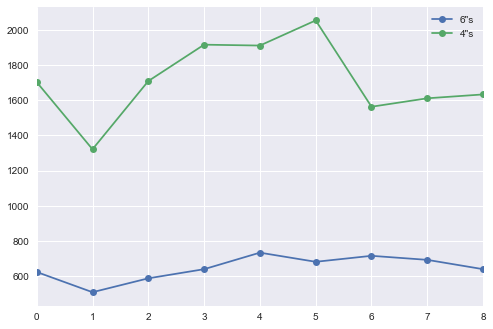

In [24]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a, left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries[['6"s','4"s']].plot(marker='o')
mlt.show()

## Runrate By Teams Across Season 

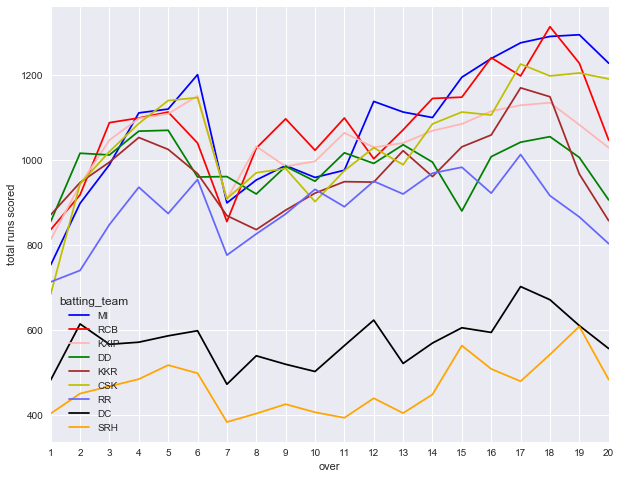

In [25]:
runs_per_ovr=deliveries.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_ovr[(matches_played_byteams[matches_played_byteams['Total Matches']>50].index)].plot(
    color=["b","r","#Ffb6b2","g","brown","y","#6666ff","black","#FFA500"])
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
mlt.xticks(x)
mlt.ylabel('total runs scored')
fig=mlt.gcf()
fig.set_size_inches(10,8)
mlt.show()


MI and RCB has having highest runrate, infact they have highest runrate in depth overs as well.

## Favorite Ground

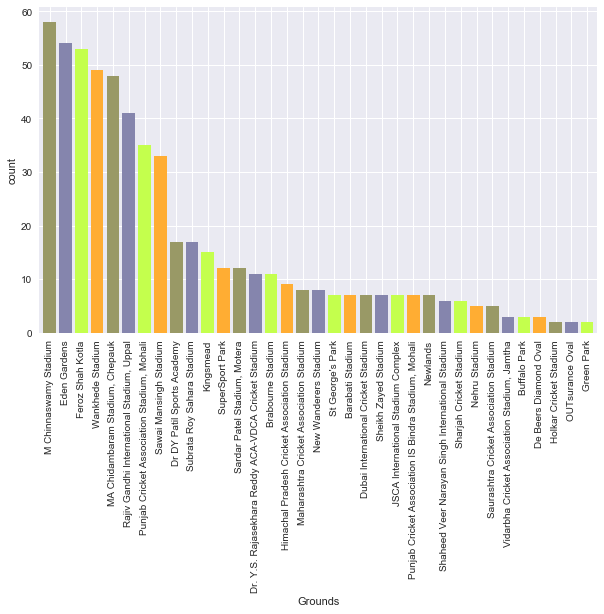

In [26]:
mlt.subplots(figsize=(10,6))
ax = matches['venue'].value_counts().plot.bar(width=.8, color=["#999966", "#8585ad", "#c4ff4d", "#ffad33"])
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
mlt.show()

## Maximum Man Of the Match 

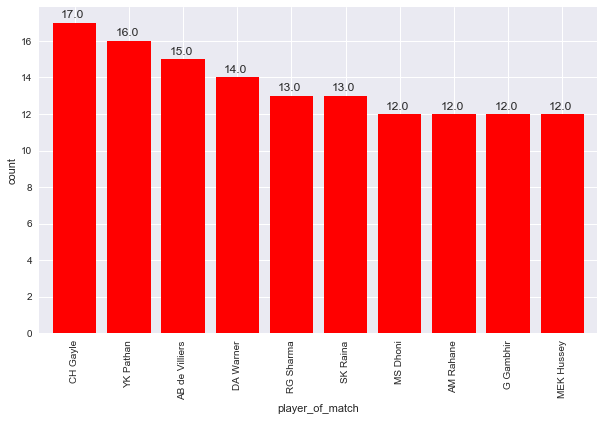

In [27]:
mlt.subplots(figsize=(10,6))
ax=matches['player_of_match'].value_counts().head(10).plot.bar(width=.8,color='R') #counts the values corresponding
ax.set_xlabel('player_of_match')
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
mlt.show()

## Winners by Year

In [28]:
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1])
    print(df[[1,10]])


season    2008
winner      RR
Name: 57, dtype: object
season    2009
winner      DC
Name: 114, dtype: object
season    2010
winner     CSK
Name: 174, dtype: object
season    2011
winner     CSK
Name: 247, dtype: object
season    2012
winner     KKR
Name: 321, dtype: object
season    2013
winner      MI
Name: 397, dtype: object
season    2014
winner     KKR
Name: 457, dtype: object
season    2015
winner      MI
Name: 516, dtype: object
season    2016
winner     SRH
Name: 576, dtype: object


## Super Overs

In [29]:
print("\n Total Matches with Super Overs:", deliveries[deliveries['is_super_over']==1].match_id.nunique())


 Total Matches with Super Overs: 6


In [30]:
teams=['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW']
play=deliveries[deliveries['is_super_over']==1].batting_team.unique()
play=list(play)
print('Teams who haven"t ever played a super over are:' ,list(set(teams)-set(play)))

Teams who haven"t ever played a super over are: ['MI', 'KTK', 'RPS', 'DC', 'PW', 'GL']


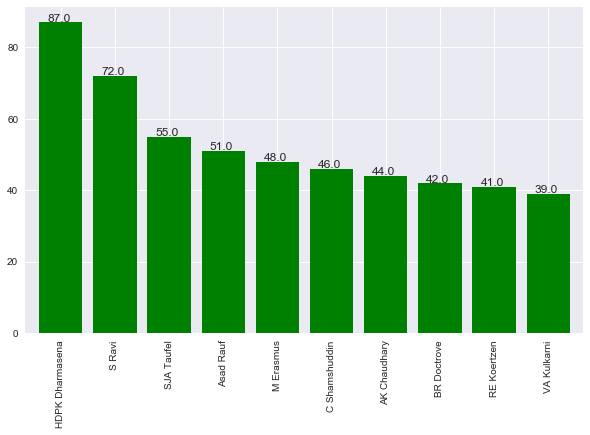

In [31]:
mlt.subplots(figsize=(10,6))
ump=pd.concat([matches['umpire1'],matches['umpire2']])
ax=ump.value_counts().head(10).plot.bar(width=.8,color='g')
for p in ax.patches:
    ax.annotate(format (p.get_height()),(p.get_x()+0.15,p.get_height()+0.25))
mlt.show()